In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
data_path = "/home/rllab/robosuite-gqcnn/robosuite/robosuite/scripts/data/iros2020"
file_names = os.listdir(data_path)

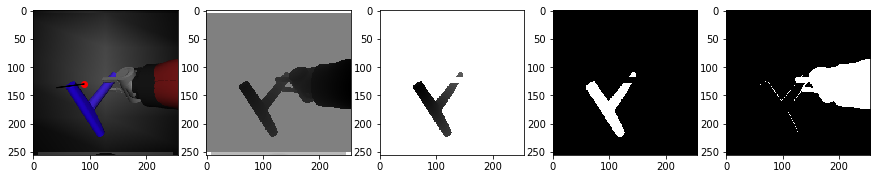

[-0.00356845  0.07305351  0.099329  ]
[1.47262156 0.58286556 4.5790699 ]
1
0.0


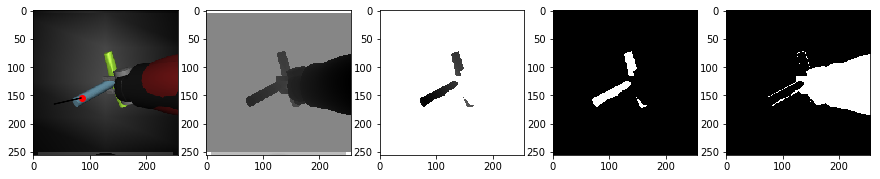

[-0.05158595  0.08302832  0.08760967]
[-0.49087385  0.22669927  4.48957631]
1
0.0


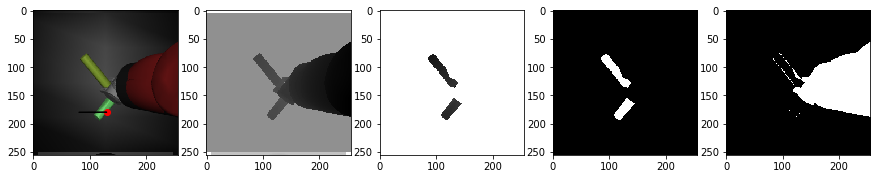

[-0.10068915 -0.00432574  0.00687494]
[-1.27627202  0.86157553  4.70800368]
1
0.0


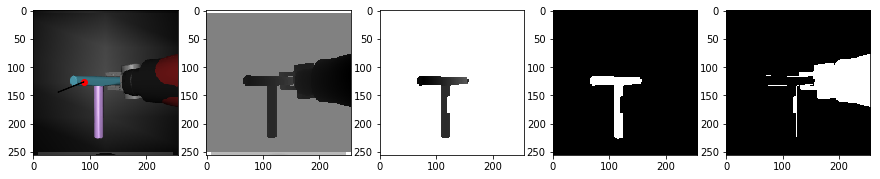

[0.00374045 0.07434959 0.10669417]
[-0.88357293  0.86428143  4.33287988]
0
0.0


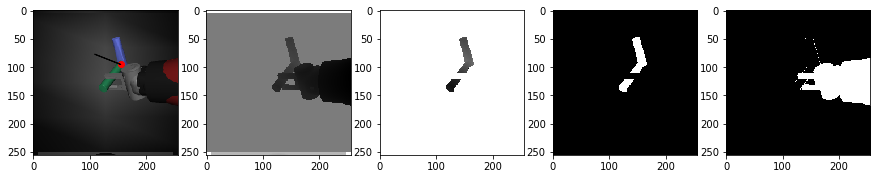

[ 0.06350824 -0.05227341 -0.06704813]
[-1.47262156  0.36153304  5.08770796]
0
1


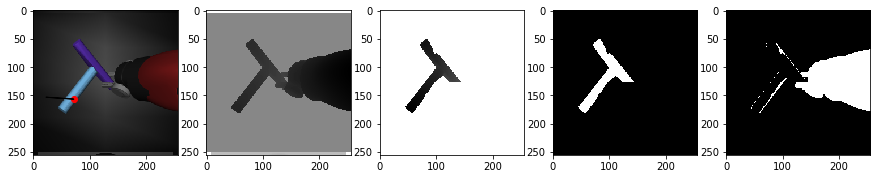

[-0.05579925  0.10921727  0.1085227 ]
[-0.88357293  0.03783216  4.78059365]
0
1


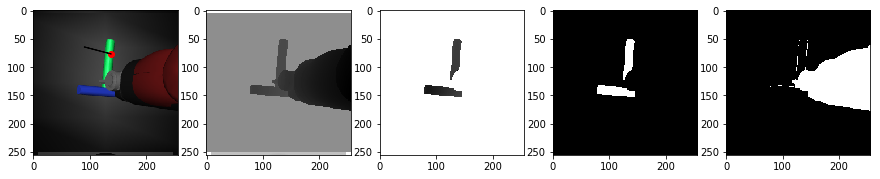

[ 0.09963139 -0.01985421 -0.00573503]
[1.47262156 0.43655651 4.96752173]
1
0.0


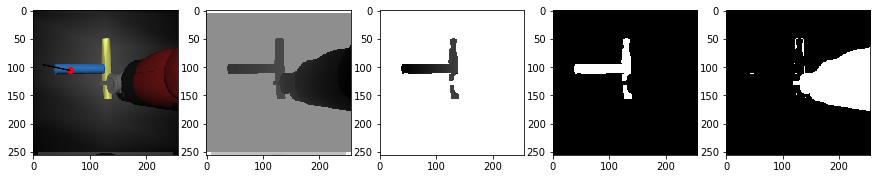

[0.04293524 0.12142297 0.09715437]
[1.27627202 0.88475781 4.919305  ]
0
0.0


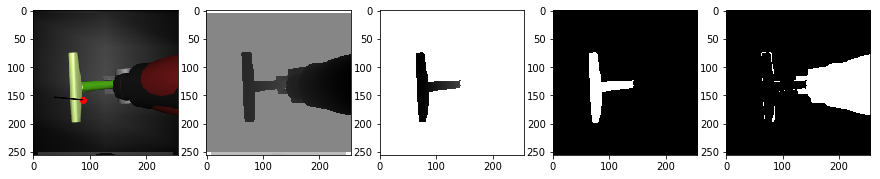

[-0.05826278  0.07960434  0.06607194]
[1.47262156 0.50224457 4.80773462]
1
0.0


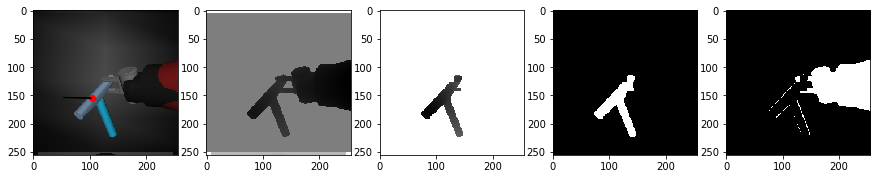

[-0.05209415  0.04853059  0.07606477]
[1.27627202 0.70724417 4.73001621]
1
0.0


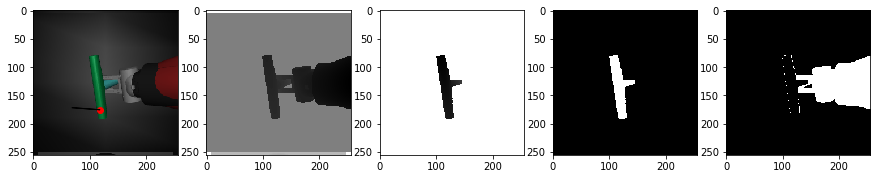

[-0.09244837  0.01961869  0.04683003]
[-1.47262156  0.72559049  4.7872632 ]
0
0.0


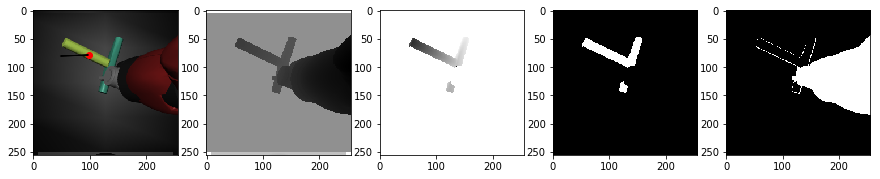

[0.09637372 0.05876454 0.0367163 ]
[0.68722339 0.41991736 4.6733228 ]
1
0.0


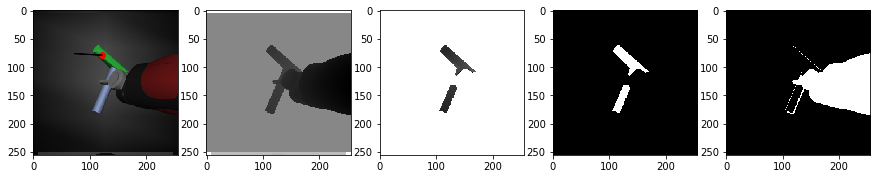

[0.0953452  0.01084477 0.03738395]
[0.68722339 0.04968372 4.77111555]
1
0.0


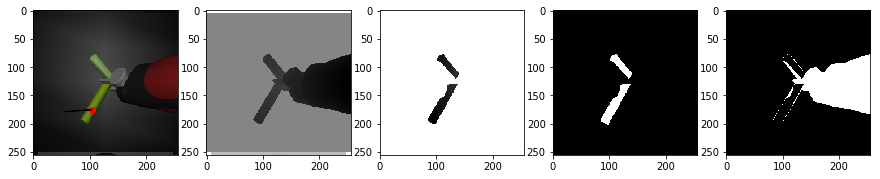

[-0.0921459   0.04805072  0.02521031]
[-0.88357293  0.11233852  4.63862534]
1
0.0


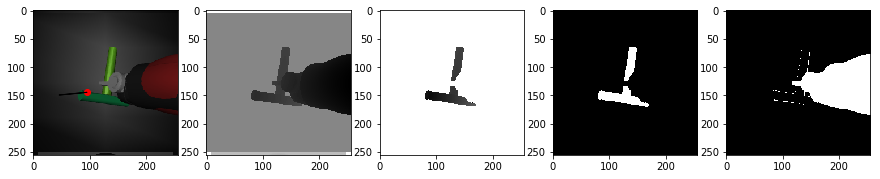

[-0.03236838  0.06397465  0.07026692]
[-1.07992247  0.82731223  4.61594748]
1
0.0


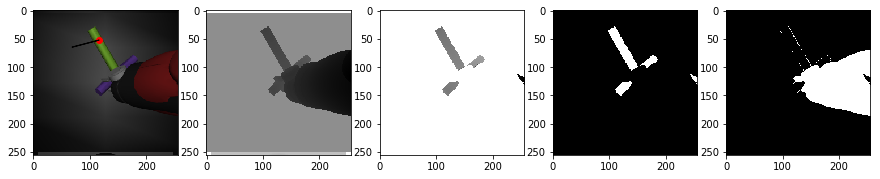

[ 0.14760457  0.02207475 -0.00183195]
[1.47262156 0.09922786 4.45732914]
1
0.0


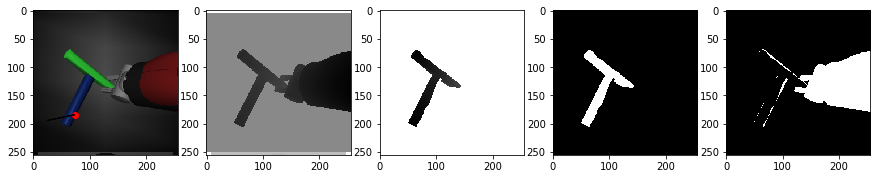

[-0.10947698  0.10662006  0.1021642 ]
[-0.88357293  0.78873683  4.50381099]
1
0.0


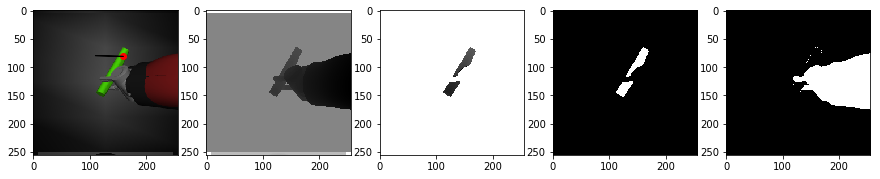

[ 0.09135271 -0.06134002 -0.04403832]
[-1.07992247  0.16601431  4.73980095]
0
1


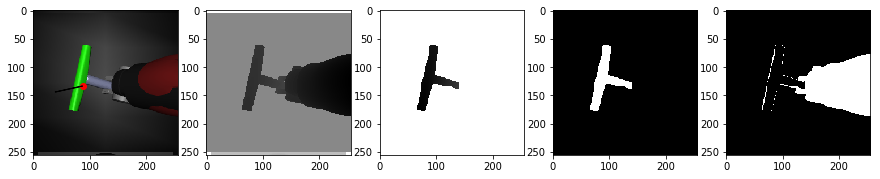

[-0.01061817  0.07917573  0.07576397]
[-1.07992247  0.24236226  4.49677476]
1
0.0


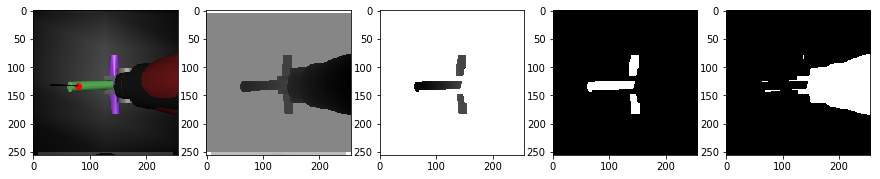

[-0.00961028  0.09412208  0.09583933]
[-0.29452431  0.44951993  4.7404041 ]
1
0.0


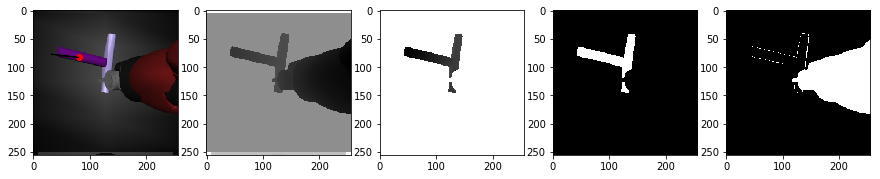

[0.08759257 0.09197205 0.05769598]
[0.29452431 0.07799807 4.83080756]
1
0.0


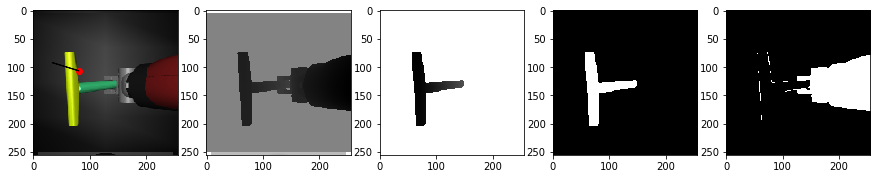

[0.04153757 0.0916252  0.08978245]
[1.07992247 0.23627427 5.01175555]
1
0.0


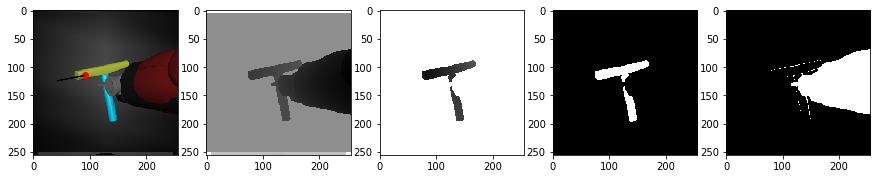

[0.0257576  0.07226974 0.06830823]
[0.09817477 0.6987062  4.51783406]
1
0.0


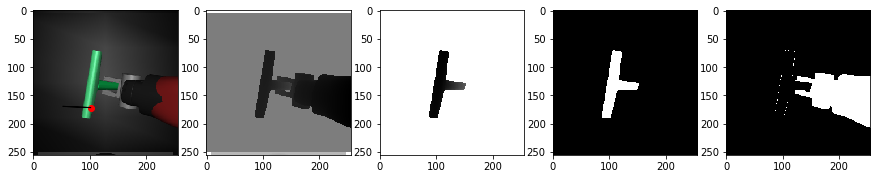

[-0.08502252  0.05088519  0.06825688]
[-1.47262156  0.76614924  4.75678355]
1
0.0


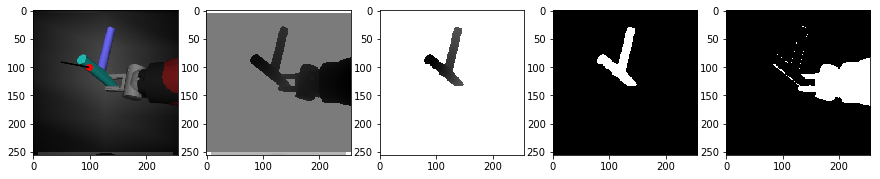

[0.05391401 0.05803928 0.11723734]
[-1.47262156  0.6537523   4.89854958]
1
0.0


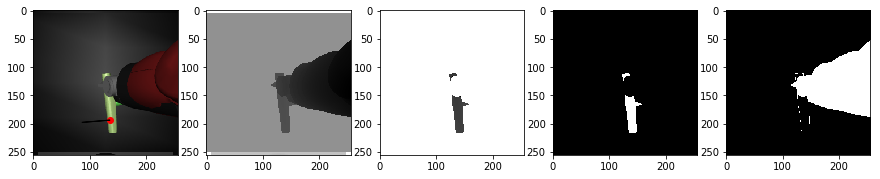

[-0.12810232 -0.01504138  0.01544449]
[1.47262156 0.19807311 4.63144027]
1
0.0


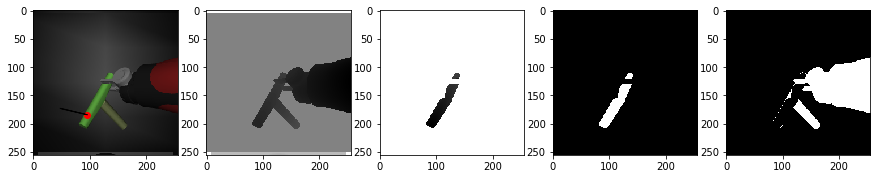

[-0.10967266  0.06264352  0.07314126]
[1.47262156 0.62313824 4.94232579]
1
0.0


KeyboardInterrupt: 

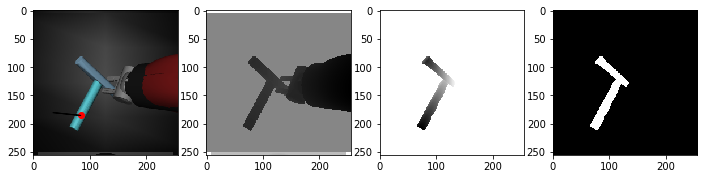

In [2]:
for i in range(len(file_names)):
    file = np.load(os.path.join(data_path, file_names[i]))
    rgb_im = file["arr_0"] 
    d_im = file["arr_1"]
    mask_d_im = file["arr_2"]
    object_mask = file["arr_3"]
    arm_mask = file["arr_4"]
    g_pos = file["arr_8"]
    g_angle = file["arr_9"]
    label = file["arr_10"]
    stuck = file["arr_11"]
    
    #if stuck == 0:
    #    continue
    delta_pos = g_pos - [0.6, 0.0, 0.77]
    
    res = 2 * 0.6 * np.tan(np.pi / 8.0) / 256.0
    delta_y, delta_x, _ = delta_pos / res
    pos_y = delta_y + 128
    pos_x = 128 - delta_x
    dx = 50 * np.sin(g_angle[2])
    dy = 50 * np.cos(g_angle[2])
    
    plt.figure(figsize=(15, 75))
    plt.subplot(151)
    plt.imshow(rgb_im)
    plt.scatter(pos_x, 256 - pos_y, color='red')
    plt.arrow(pos_x, 256 - pos_y, dx, -dy)
    plt.subplot(152)
    plt.imshow(d_im, cmap='gray')
    plt.subplot(153)
    plt.imshow(mask_d_im, cmap='gray')
    plt.subplot(154)
    plt.imshow(object_mask, cmap='gray')
    plt.subplot(155)
    plt.imshow(arm_mask, cmap='gray')
    plt.show()
    print(delta_pos)
    print(g_angle)
    print(label)
    print(stuck)